In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

%matplotlib inline
plt.style.use('ggplot')
warnings.filterwarnings('ignore')

dir_data = 'D:/angel/4th-ML100Days/'

In [3]:
f_app = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app)
app_train.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
app_train['AMT_CREDIT'] = abs(app_train['AMT_CREDIT'])

In [22]:
age_data = app_train[['TARGET', 'AMT_CREDIT']]
age_data['AMT_CREDIT'] = age_data['AMT_CREDIT']

age_data['AMT_CREDIT'] = pd.cut(age_data['AMT_CREDIT'],
                                  bins = np.linspace(0, 1000000, num = 11))
print(age_data['AMT_CREDIT'].value_counts())
age_data.head()

(200000.0, 300000.0]     54813
(500000.0, 600000.0]     34232
(400000.0, 500000.0]     32038
(100000.0, 200000.0]     30140
(300000.0, 400000.0]     26338
(600000.0, 700000.0]     24049
(800000.0, 900000.0]     21792
(700000.0, 800000.0]     19193
(900000.0, 1000000.0]     8927
(0.0, 100000.0]           6004
Name: AMT_CREDIT, dtype: int64


,TARGET,AMT_CREDIT
0,1,"(400000.0, 500000.0]"
1,0,NaN
2,0,"(100000.0, 200000.0]"
3,0,"(300000.0, 400000.0]"
4,0,"(500000.0, 600000.0]"


In [21]:
year_group_sorted = np.sort(age_data['AMT_CREDIT'].unique())
age_data.head()

plt.figure(figsize=(8,6))
for i in range(len(year_group_sorted)):
    sns.distplot(age_data.loc[(age_data['AMT_CREDIT'] == year_group_sorted[i]) & \
                            (age_data['TARGET'] == 0), 'AMT_CREDIT'], label = str(year_group_sorted[i]))
    sns.distplot(age_data.loc[(age_data['AMT_CREDIT'] == year_group_sorted[i]) & \
                            (age_data['TARGET'] == 1), 'AMT_CREDIT'], label = str(year_group_sorted[i]))
plt.title('KDE with Age groups')
plt.show()

TypeError: unorderable types: Interval() > float()

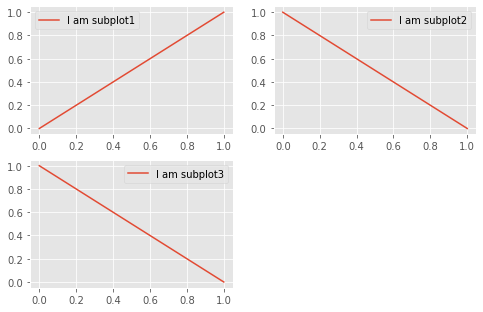

In [7]:
plt.figure(figsize=(8,8))

plt.subplot(321)
plt.plot([0,1],[0,1], label = 'I am subplot1')
plt.legend()

plt.subplot(322)
plt.plot([0,1],[1,0], label = 'I am subplot2')
plt.legend()

plt.subplot(323)
plt.plot([0,1],[1,0], label = 'I am subplot3')
plt.legend()

plt.show()

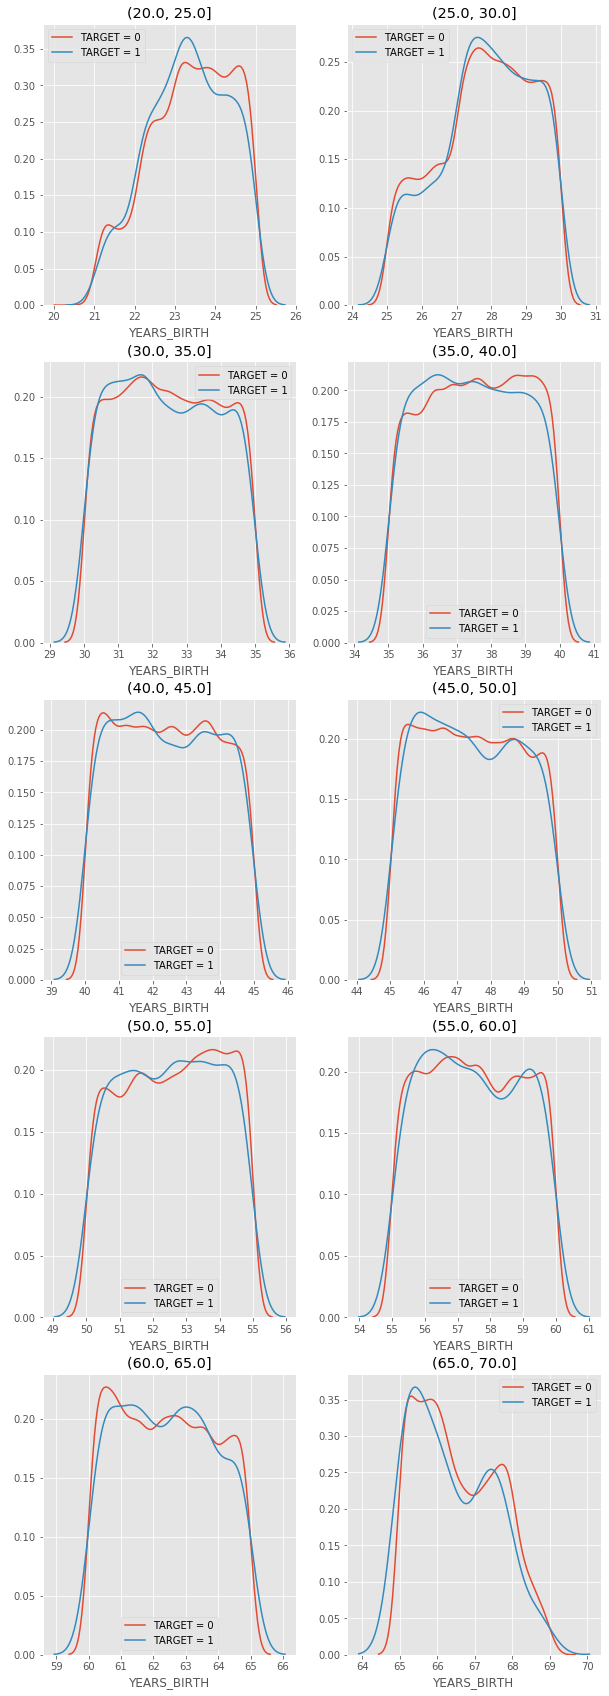

In [8]:
nrows = 5
ncols = 2

plt.figure(figsize = (10,30))
for i in range(len(year_group_sorted)):
    plt.subplot(nrows, ncols, i+1)
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                             (age_data['TARGET'] == 0), 'YEARS_BIRTH'],
                label = "TARGET = 0", hist = False)
    sns.distplot(age_data.loc[(age_data['YEARS_BINNED'] == year_group_sorted[i]) & \
                             (age_data['TARGET'] == 1), 'YEARS_BIRTH'],
                label = "TARGET = 1", hist = False)
    plt.title(str(year_group_sorted[i]))
plt.show()    